In [159]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

In [160]:
x_min = 0
x_max = 20
y_min = 0
y_max = 20

### Линейно разделимые классы

In [161]:
data = pd\
    .DataFrame(np.random.rand(200,2) * 20)\
    .rename(columns={0: 'x1', 1: 'x2'})

In [162]:
data = data[(data.x1 > 2 * data.x2 + 7) | (data.x1 < 2 * data.x2 + 1)]
data['y'] = data['x1'] > 2 * data['x2'] + 3

In [163]:
clf = SVC(kernel='linear')

In [164]:
clf.fit(data[['x1', 'x2']], data['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


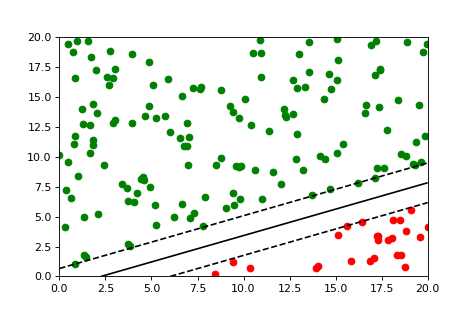

In [165]:
plt.scatter(data[data['y'] == True]['x1'], data[data['y'] == True]['x2'], color = "red")
plt.scatter(data[data['y'] == False]['x1'], data[data['y'] == False]['x2'], color = "green")

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Линейно неразделимые классы

In [170]:
data = pd\
    .DataFrame(np.random.rand(1000,2) * 20)\
    .rename(columns={0: 'x1', 1: 'x2'})

In [171]:
data_class1 = data[(data.x1 - 10)**2 + (data.x2 - 10)**2 < 7]
data_class1.loc[:, 'y'] = False

In [172]:
data_class2 = data[(data.x1 - 10)**2 + (data.x2 - 10)**2 > 17]
data_class2.loc[:, 'y'] = True

In [173]:
data = pd.concat([data_class1, data_class2])
data = data.sample(frac=1).reset_index(drop=True)

#### Нелинейное ядро

In [174]:
clf = SVC(kernel='rbf', gamma=0.1)
clf.fit(data[['x1', 'x2']], data['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [175]:
clf.score(data[['x1', 'x2']], data['y'])

1.0

<IPython.core.display.Javascript object>


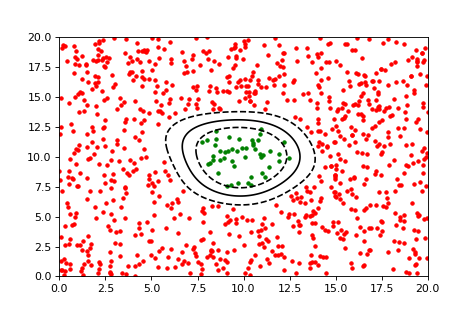

In [176]:
plt.scatter(data[data.y == True]['x1'], data[data.y == True]['x2'], color = 'red', marker='.')
plt.scatter(data[data.y == False]['x1'], data[data.y == False]['x2'], color = "green", marker='.')

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-0.7, 0, 0.7])
plt.plot()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#### Преобразование фичей (добавляем измерение по которому будет откладываться квадрат радиуса от центра)

In [177]:
data['x3'] = data['x1']**2 + data['x2']**2

<IPython.core.display.Javascript object>


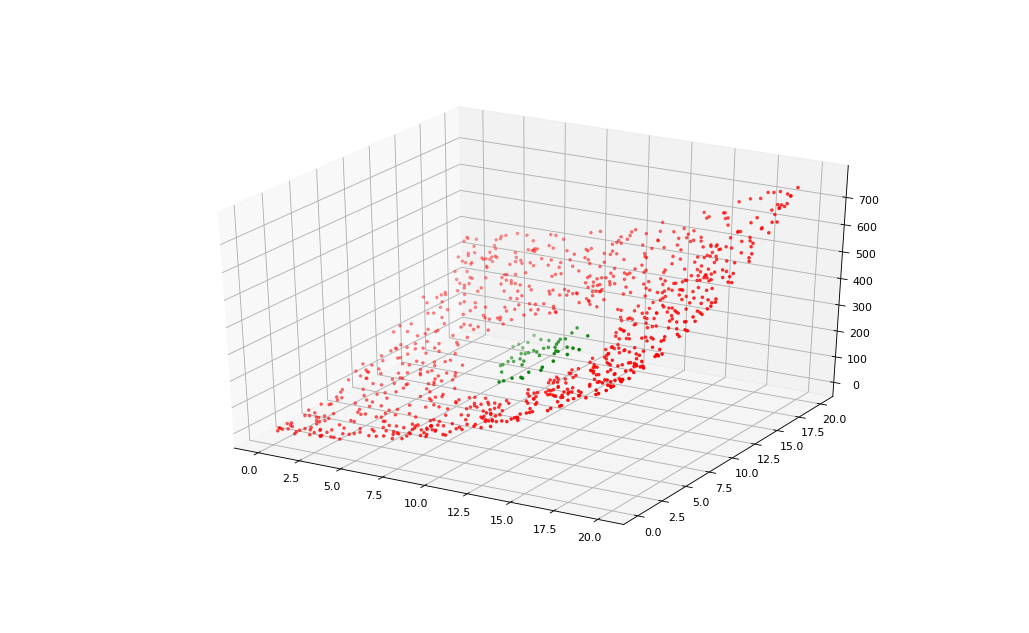

In [178]:
fig = plt.figure(figsize=(13,8))
ax = plt.axes(projection='3d')

ax.scatter(
    data[data.y == True]['x1'], 
    data[data.y == True]['x2'], 
    data[data.y == True]['x3'], 
    color = 'red', 
    marker='.')
ax.scatter(
    data[data.y == False]['x1'], 
    data[data.y == False]['x2'],
    data[data.y == False]['x3'],
    color = "green", 
    marker='.');

In [179]:
clf = SVC(kernel='linear')
clf.fit(data[['x1', 'x2', 'x3']], data['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

##### Как видим удалось с абсолютной точностью разделить классы линейным классификатором (плоскостью)

In [180]:
clf.score(data[['x1', 'x2', 'x3']], data['y'])

1.0